# Week 1 - The What Why and when of Machine Learning
Main idea is to follow that notebook in order to have an initial aproach -  this doesn't means that you only have to answer to the questions or implement code. Feel free to add all the interesting content that you find and take conclusions from the data. Please just use this as a template

# 0. Library import and list input files

In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sys

%matplotlib inline
#Ignore Warnings - save some confusion
import warnings
warnings.filterwarnings('ignore')

#Pandas more columns
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)

# Add input as import path
sys.path.insert(0,'../input')

# Plot style
plt.style.use('fivethirtyeight')

# Import the data from the dataset
train_data = pd.read_csv('../input/train.csv', index_col='id')
test_data = pd.read_csv('../input/test.csv', index_col='id')


# 1. Feature engineering

### 1.1 Data engineering.
Objectives:
* Create three new features using the actual features.
* Create plots like in the first session. (Categorical / Numerical)


In [2]:
# Todo 1 : Create a new feature that describes if people travels alone or not.
#dataset['TravelAlone'] = ...
train_data['TravelAlone'] = (train_data["sibsp"] == 0) & (train_data["parch"] == 0)
# Todo 2 : Create a new feature that represents the FamilySize - for each passenger a new column with a number 1..n
train_data['FamilySize'] = (train_data["sibsp"]) + (train_data["parch"])
# Todo 3 : Create a new feature based in the Title name for example Sr, Mrs, Rev.
# Clue 1: As we can see different classes of title name exist. Decide how to group and decide 
train_data["titles"] = train_data['name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
titles_dict={k:v for v,k in enumerate(set(train_data["titles"]))}
train_data["titles"].replace(titles_dict)

#dataset['RareName'] = ....

# Optional : Plot the data in plots like in the previous training notebook (Categorical / Numerical)


id
277     10
562      7
111      7
930      8
841      7
585      8
609      8
540      7
1075     8
390      8
921      8
339      5
155     10
564      7
694      8
1028     7
1184     8
633      8
907      7
426      8
1210     8
257     10
474      8
439      8
9        8
948      8
762      5
802      8
482      7
893      8
        ..
408      8
87       8
810      8
276      8
751      8
550     10
231      0
879      8
896      8
835      8
752      8
984      7
163     10
1063     8
29       8
200      8
285      8
1267    10
783      8
1074     8
1087     8
982      8
677      8
977      8
35       7
626      7
640      5
845     10
1291     8
639      5
Name: titles, Length: 654, dtype: int64

### 1.2 Data correlation.
Objectives:
* Create a heatmap that show the data correlation
* Understand the data correlation

Questions:
* Q1: Which are the top three pairs of data with more correlation? (ToDo 1..2 and 3..4 ) 
* Q2: Is the sex of the passengers related with survival?
* Q3: If two features have a lot of correlation we want to preserve both or only use one?
* Q4: Are the previous new created features related with the survivance in the accident? Choose the one that you think that is the best.


          pclass       age
pclass  1.000000 -0.417239
age    -0.417239  1.000000
Data Correlation for the features pclass/age
          survived
survived       1.0
Q1: This is my response for the first question!


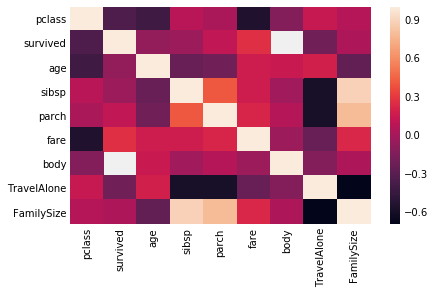

In [4]:
print (train_data[["pclass","age"]].corr())

# PreTodo. Copying train_data into another variable. Some examples
sample_data = train_data.copy()
sample_data.drop(columns=["body"], inplace=True) #Dropping target variable
sex_types = {"male":1, "female":0}
sample_data["sex"] = sample_data["sex"].apply(sex_types.get) # Converting into numerical label
#Work with your train data , the same way we work with sample_data


#fig, axs = plt.subplots(1,2)
# ToDO 1: Compute the correlation for all the features ( Remember that the survived column is our label )
print("Data Correlation for the features pclass/age")
data_correlation = train_data.corr()
# ToDo 2: Plot the data in a fancy plot like the sns.heatmap
sns.heatmap(data_correlation)
# ToDo 3: Compute the correlation between the sex feature and survived label 
#train_data["sex"].replace({"female":0,"male":1}, inplace=True)
sex_survived_correlation = train_data[["sex","survived"]].corr()
print(sex_survived_correlation)
#sns.heatmap(sex_survived_correlation,ax=axs[1])


#sex_survived_correlation

# ToDo 4: Plot the data in a fancy plot like the sns.heatmap
#sns.heatmap(....)
# Todo 3: Questions
print("Q1: This is my response for the first question!")

# 2. Data visualization.
Objectives:
* Use PCA to reduce the dimensions of our data
* Analyze the separability of our data

Questions:
* Q1: Is the data separable?
* Q2: You think that we need to reduce the dimensionality of our data?
* Q3: Find whitch infromation returns the explained_variance_ratio_ method


Before scale:
    age  pclass  sibsp  embarked  sex
0   0.0       1      1         2    1
1  30.0       2      0         0    1
2  24.0       1      3         3    1


After scale:
        age  pclass  sibsp  embarked  sex
0  0.000000     0.0  0.125  0.666667  1.0
1  0.405405     0.5  0.000  0.000000  1.0
2  0.324324     0.0  0.375  1.000000  1.0




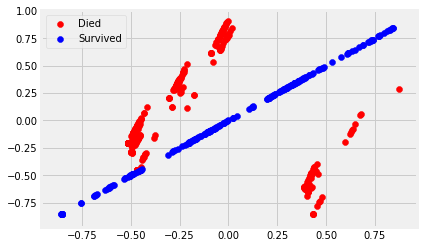

[0.42702773 0.31437889 0.15612069]


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA as sklearnPCA
# 
"""
First of all we need to scale our data we have different features measured in different "units" what we need is to normali
this features to be in the same range, the easiest way to do this is with the MinMaxScaler
"""

# 1. Select a subset of data
#train_data_subset = train_data[["age", "sex", "pclass", "embarked", "TravelAlone"]]
train_data_subset = train_data[["age", "pclass", "sibsp", "embarked", "sex"]]

# Todo 1: Convert the categorical labels to numerical for example Sex can be converted to a boolean
sex_dict={k:v for v,k in enumerate(set(train_data["sex"]))}
embarked_dict={k:v for v,k in enumerate(set(train_data["embarked"]))}
train_data_subset["sex"].replace(sex_dict,inplace=True) 
train_data_subset["embarked"].replace(embarked_dict, inplace=True)

# 2. Remove NA with 0 probably exist a better way :)
train_data_subset.fillna(0, inplace=True)

# 3. Scale the data
scaler = MinMaxScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data_subset), columns=train_data_subset.columns)

#After
print("Before scale:")
print(train_data_subset[0:3])
print("\n")
#Before
print("After scale:")
print(train_data_scaled[0:3])
print("\n")

# 4. Compute PCA
pca = sklearnPCA(n_components=3) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(train_data_scaled))
train_data.index = range(len(train_data.index))

# 5. Plot the data with the reduced dimentions
plt.scatter(transformed[train_data["survived"]==0][0], transformed[train_data["survived"]==0][1], label='Died', c='red')
plt.scatter(transformed[train_data["survived"]==1][1], transformed[train_data["survived"]==1][1], label='Survived', c='blue')
plt.legend()
plt.show()

# 6. Interesting methods
print(pca.explained_variance_ratio_ )
